### Problem Statement: Prepare a classification model using Naive Bayes for salary data

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Load dataset

In [2]:
sal_train = pd.read_csv('SalaryData_Train.csv')
sal_test = pd.read_csv('SalaryData_Test.csv')

In [3]:
sal_df = pd.concat([sal_train, sal_test]).drop_duplicates().reset_index(drop=True)

In [4]:
sal_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
39235,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
39236,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
39237,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
object_attrib = sal_df.select_dtypes(include = ['object'])
object_attrib.columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [6]:
# Remove leading white space of the column with 'Object' data
for col in object_attrib:
    sal_df[col].str.lstrip()

In [7]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over each column and extract their dtypes
for col in sal_df.columns:
    # Compare if the dtype is object
    if sal_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        sal_df[col] = le.fit_transform(sal_df[col])

# Check that everything has been converted to numeric
sal_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,48,1,12,14,0,7,1,4,1,0,0,40,37,0
39235,33,2,9,13,4,9,3,4,1,0,0,40,37,0
39236,39,2,9,13,0,9,1,4,0,0,0,36,37,0
39237,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


#### EDA on dataset

In [8]:
# Check for first 5 records
sal_df.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [9]:
# Check for last 5 records
sal_df.tail(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
39234,48,1,12,14,0,7,1,4,1,0,0,40,37,0
39235,33,2,9,13,4,9,3,4,1,0,0,40,37,0
39236,39,2,9,13,0,9,1,4,0,0,0,36,37,0
39237,44,2,9,13,0,0,3,1,1,5455,0,40,37,0
39238,35,3,9,13,2,3,0,4,1,0,0,60,37,1


In [10]:
# Get central tendency, dispersion and shape of dataset’s distribution
sal_df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,39.309412,2.228752,10.212824,10.136293,2.568618,6.076098,1.451566,3.638931,0.665078,1253.346186,101.207727,41.206121,35.202936,0.254211
std,13.298159,1.010177,3.882256,2.637228,1.538130,4.019794,1.618028,0.877948,0.471969,7994.096625,431.309171,12.458178,6.324275,0.435423
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,2.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,38.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,1.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [11]:
# Check for data types, non-null values & memory usage
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            39239 non-null  int64
 1   workclass      39239 non-null  int32
 2   education      39239 non-null  int32
 3   educationno    39239 non-null  int64
 4   maritalstatus  39239 non-null  int32
 5   occupation     39239 non-null  int32
 6   relationship   39239 non-null  int32
 7   race           39239 non-null  int32
 8   sex            39239 non-null  int32
 9   capitalgain    39239 non-null  int64
 10  capitalloss    39239 non-null  int64
 11  hoursperweek   39239 non-null  int64
 12  native         39239 non-null  int32
 13  Salary         39239 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.8 MB


In [12]:
# Checking Null values
sal_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [13]:
# Check for the column labels of the DataFrame
sal_df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [14]:
# Check the dimensions of the DataFrame
sal_df.shape

(39239, 14)

In [15]:
# Check for the random sample from the DataFrame
sal_df.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30263,76,2,15,10,6,11,1,1,0,2062,0,37,37,0
56,30,2,9,13,2,11,0,4,1,2407,0,40,37,0
12514,43,1,12,14,4,3,1,4,0,10520,0,50,37,1
11754,26,1,12,14,4,9,1,4,1,0,0,50,37,0
21849,60,2,11,9,2,6,0,4,1,7688,0,40,37,1


In [16]:
sal_df.Salary.value_counts()

0    29264
1     9975
Name: Salary, dtype: int64

#### Visualize data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC63183788>,
      dtype=object)

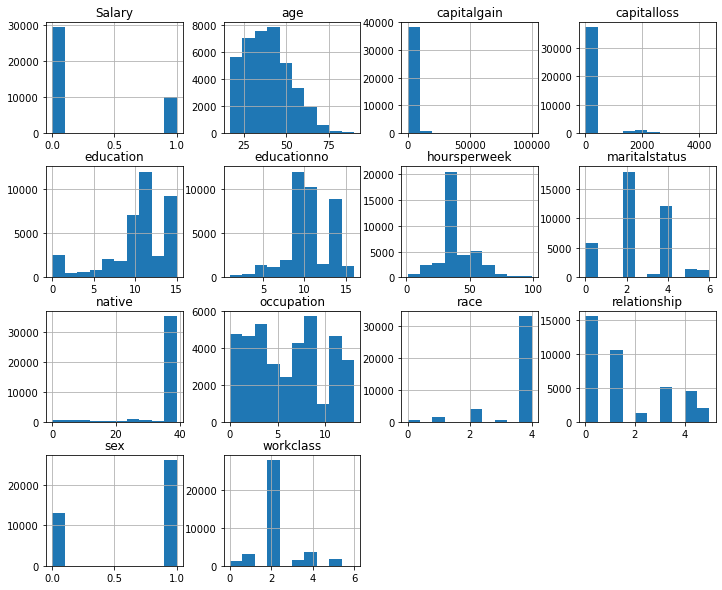

In [17]:
# Check for data normalization using histogram
sal_df.hist(figsize = (12, 10))

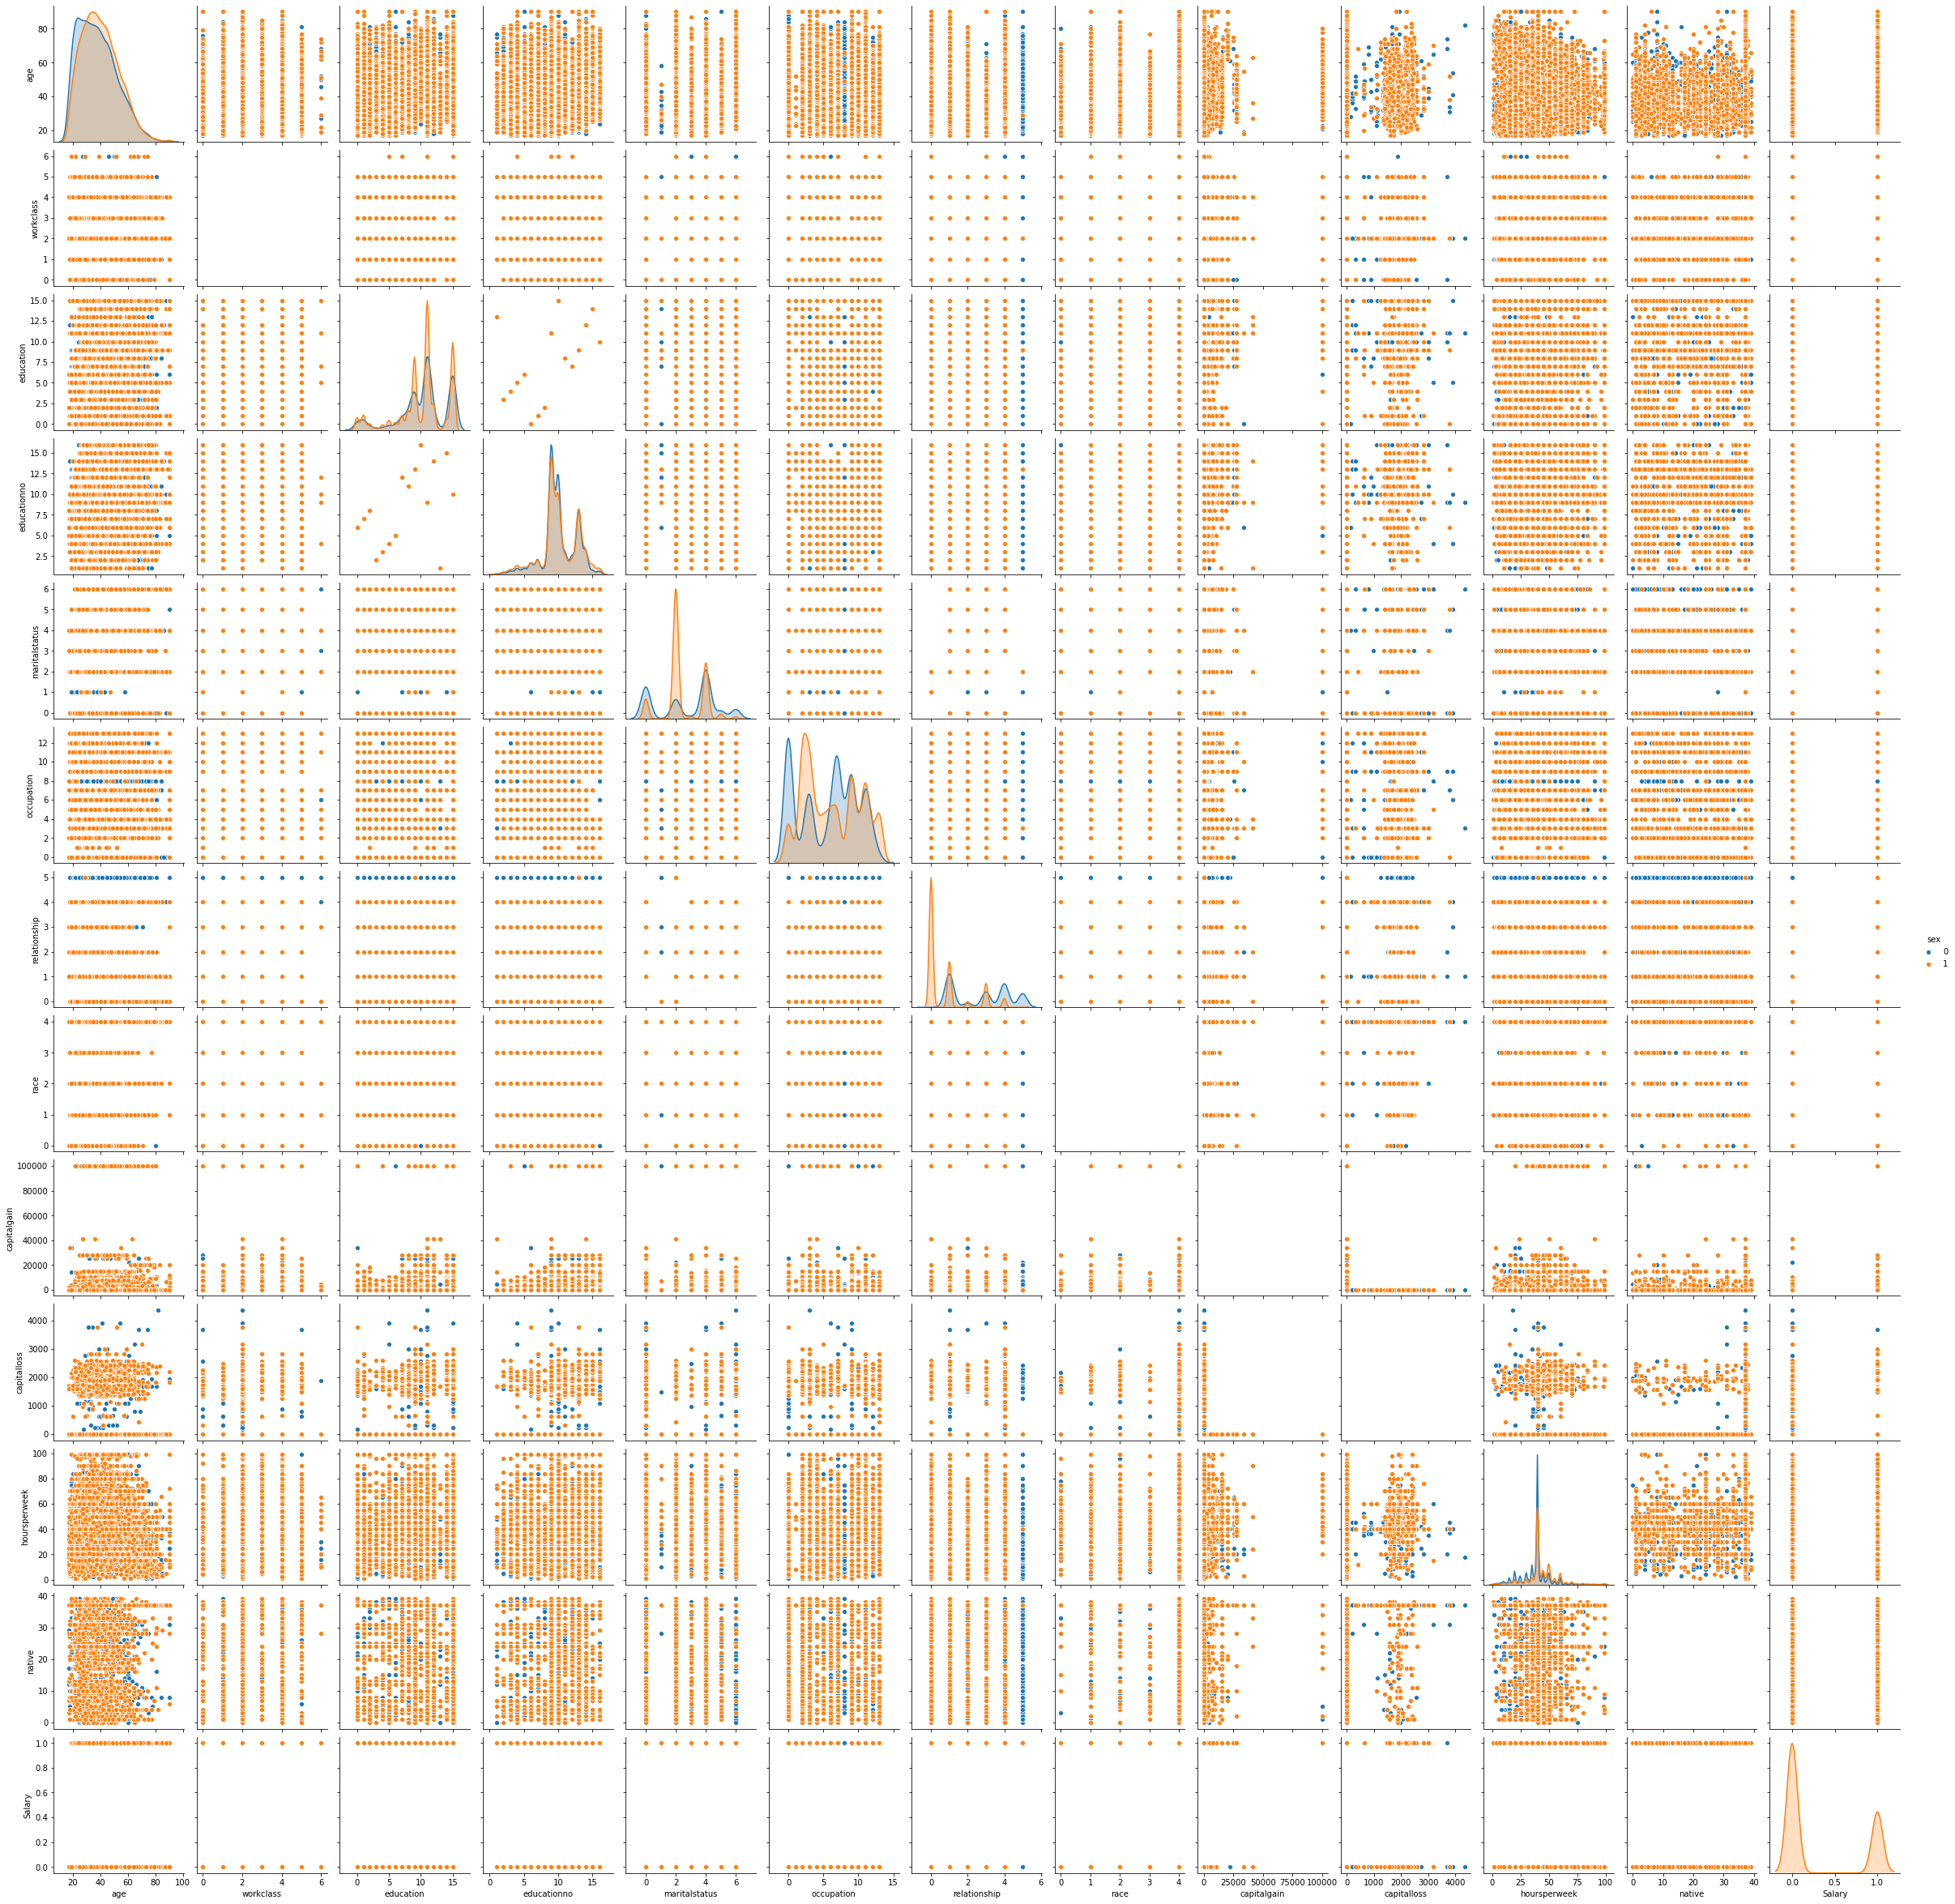

In [18]:
sns.pairplot(sal_df, hue = 'sex')

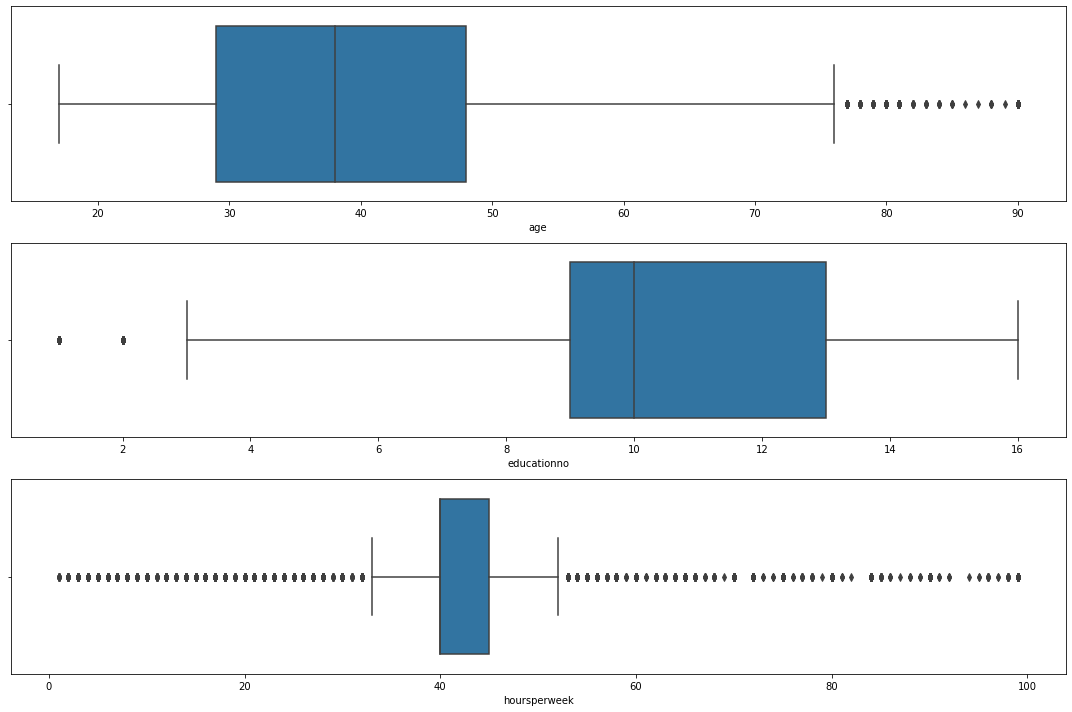

In [19]:
# Check for Outliers in dataset
fig, axs = plt.subplots(3, figsize = (15, 10))
plt1 = sns.boxplot(sal_df.age, ax = axs[0])
plt2 = sns.boxplot(sal_df.educationno, ax = axs[1])
plt3 = sns.boxplot(sal_df.hoursperweek, ax = axs[2])
plt.tight_layout()

#### Correlation Analysis

In [20]:
sal_df.corr(method = 'pearson')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.079642,0.001807,0.030211,-0.233279,-0.004676,-0.230643,0.044616,0.068483,0.075495,0.049876,0.066927,0.012129,0.214285
workclass,0.079642,1.000000,0.022333,0.041859,-0.031786,0.016217,-0.070247,0.059339,0.075331,0.031985,0.002649,0.047542,0.010469,0.015598
education,0.001807,0.022333,1.000000,0.366443,-0.043411,-0.020636,-0.010764,0.003913,-0.029864,0.035072,0.024082,0.060431,0.075014,0.094952
educationno,0.030211,0.041859,0.366443,1.000000,-0.069475,0.087334,-0.085939,0.033594,0.006596,0.129552,0.082594,0.136030,0.097527,0.329569
maritalstatus,-0.233279,-0.031786,-0.043411,-0.069475,1.000000,0.006666,0.155762,-0.075430,-0.109154,-0.042309,-0.033607,-0.167011,-0.026461,-0.181626
occupation,-0.004676,0.016217,-0.020636,0.087334,0.006666,1.000000,-0.061367,0.008746,0.061054,0.016952,0.010978,0.020983,0.004230,0.049738
relationship,-0.230643,-0.070247,-0.010764,-0.085939,0.155762,-0.061367,1.000000,-0.113604,-0.584810,-0.062712,-0.066390,-0.247737,-0.001036,-0.244911
race,0.044616,0.059339,0.003913,0.033594,-0.075430,0.008746,-0.113604,1.000000,0.085235,0.021099,0.031794,0.053968,0.116142,0.078779
sex,0.068483,0.075331,-0.029864,0.006596,-0.109154,0.061054,-0.584810,0.085235,1.000000,0.052882,0.053687,0.226747,-0.010639,0.212912
capitalgain,0.075495,0.031985,0.035072,0.129552,-0.042309,0.016952,-0.062712,0.021099,0.052882,1.000000,-0.036791,0.082977,0.012924,0.231529


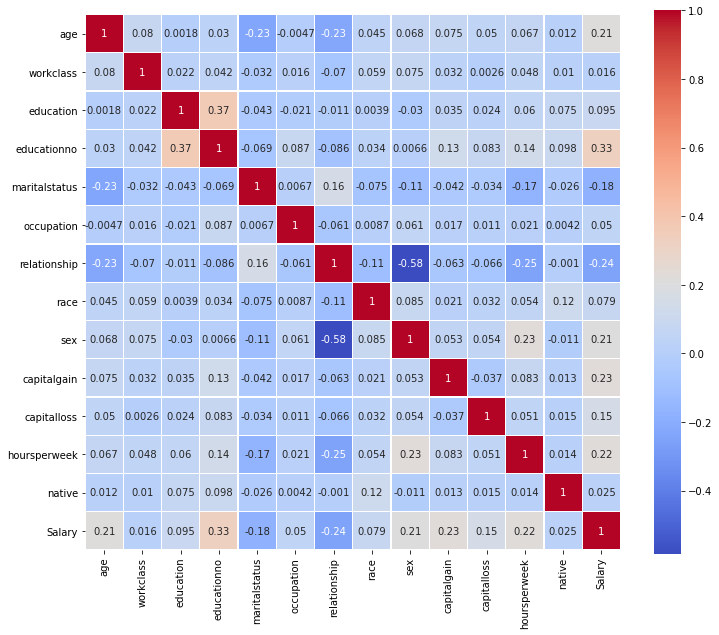

In [21]:
# Correlation
corr = sal_df.corr()
fig, axs = plt.subplots(1, figsize = (12, 10))
sns.heatmap(corr, square = True, linewidths = .3, cmap = "coolwarm", annot = True)
plt.show()

In [22]:
features_mean= list(sal_df.columns[1:14])

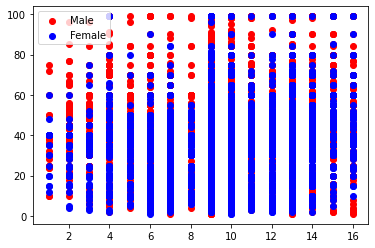

In [23]:
M = sal_df[sal_df.sex == 1] # Male
F = sal_df[sal_df.sex == 0] # Female
plt.scatter(M.educationno, M.hoursperweek, color = 'red', label = "Male")
plt.scatter(F.educationno, F.hoursperweek, color = 'blue', label = "Female")
plt.legend()
plt.show()

#### Split dataset into train & test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Define Predictors and target variables
x = sal_df.iloc[:, :-1]
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,48,1,12,14,0,7,1,4,1,0,0,40,37
39235,33,2,9,13,4,9,3,4,1,0,0,40,37
39236,39,2,9,13,0,9,1,4,0,0,0,36,37
39237,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [26]:
y = sal_df.Salary
y

0        0
1        0
2        0
3        0
4        0
        ..
39234    0
39235    0
39236    0
39237    0
39238    1
Name: Salary, Length: 39239, dtype: int32

In [27]:
# Split the data into training/testing sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = .25, random_state = 0)

#### GaussianNB

In [28]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [29]:
gnb = GaussianNB()

In [30]:
# Fit the learning model to the training data
gnb.fit(X_Train, Y_Train)

GaussianNB()

In [31]:
# Predict the Test Set results
Y_Predict_gnb = gnb.predict(X_Test)
Y_Predict_gnb

array([0, 1, 0, ..., 0, 1, 0])

In [32]:
# Accuracy score
Conf_Mat_gnb = confusion_matrix(Y_Test, Y_Predict_gnb)
Conf_Mat_gnb

array([[6930,  395],
       [1603,  882]], dtype=int64)

In [33]:
acc_gnb = accuracy_score(Y_Test, Y_Predict_gnb)*100
print("Accuracy of GaussianNB = " +str(round(acc_gnb, 2)) + "%")

Accuracy of GaussianNB = 79.63%


#### MultinomialNB

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
mnb = MultinomialNB()

In [36]:
# Fit the learning model to the training data
mnb.fit(X_Train, Y_Train)

MultinomialNB()

In [37]:
# Predict the Test Set results
Y_Predict_mnb = mnb.predict(X_Test)
Y_Predict_mnb

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
# Accuracy score
Conf_Mat_mnb = confusion_matrix(Y_Test, Y_Predict_mnb)
Conf_Mat_mnb

array([[6968,  357],
       [1899,  586]], dtype=int64)

In [39]:
acc_mnb = accuracy_score(Y_Test, Y_Predict_mnb)*100
print("Accuracy of MultinomialNB = " +str(round(acc_mnb, 2)) + "%")

Accuracy of MultinomialNB = 77.0%


#### BernoulliNB

In [40]:
from sklearn.naive_bayes import BernoulliNB

In [41]:
bnb = BernoulliNB()

In [42]:
# Fit the learning model to the training data
bnb.fit(X_Train, Y_Train)

BernoulliNB()

In [43]:
# Predict the Test Set results
Y_Predict_bnb = bnb.predict(X_Test)
Y_Predict_bnb

array([0, 0, 0, ..., 0, 1, 0])

In [44]:
# Accuracy score
Conf_Mat_bnb = confusion_matrix(Y_Test, Y_Predict_bnb)
Conf_Mat_bnb

array([[5429, 1896],
       [ 759, 1726]], dtype=int64)

In [45]:
acc_bnb = accuracy_score(Y_Test, Y_Predict_bnb)*100
print("Accuracy of BernoulliNB = " +str(round(acc_bnb, 2)) + "%")

Accuracy of BernoulliNB = 72.94%
